# Introduction au librairies Phython 

Une des grandes forces du langage Python réside dans le nombre important de bibliothèques logicielles externes disponibles. Une bibliothèque est un ensemble de fonctions. Celles-ci sont regroupées et mises à disposition afin de pouvoir être utilisées sans avoir à les réécrire. Celles-ci permettent de faire : du calcul numérique, du graphisme, de la programmation internet ou réseau, du formatage de texte, de la génération de documents...

La distribution standard de Python contient un certain nombre de bibliothèques qui ont été considérées comme suffisamment génériques pour intéresser la majorité des utilisateurs. Dans ce notebook vous pouvez trouver les bases des librairies fondamentales en python pour la Data Science, c'est à dire pandas, numpy, matplotlib et sklearn. Ce notebook a un objectif double, d'acquérir la syntaxe de bases de ces librairies mais aussi un aide mémoire synthétique. 

## Pandas 
Pandas est une librairie python qui permet de manipuler facilement des données à analyser, elle permet notamment de :
manipuler des tableaux de données avec des étiquettes de variables (colonnes) et d'individus (lignes). Ces tableaux sont appelés DataFrames, similaires aux dataframes sous R. On peut facilement lire et écrire ces dataframes à partir ou vers un fichier tabulé. Il est également assez simple de tracer des graphes à partir de ces DataFrames grâce à la librairies matplotlib.

La première chose à faire est d'importer les librairies. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp 

## Découvertes des objets pandas 

### Les series 
Les series sont des vecteurs de valeurs d'une variable, soit un tableau à une dimension

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0]) 
print(data) 

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64


Il est possible d'effectuer plusieurs opération sur les séries tel que : 


In [3]:
s1 = pd.Series([1, 2, 3], ['a', 'b', 'c'])
s2 = pd.Series([4, 5, 6], ['a', 'd', 'c'])
s1 + s2

a    5.0
b    NaN
c    9.0
d    NaN
dtype: float64

Comme on peut le voir les séries sont des objets structuré tel que : (WIP) 

In [4]:
data.values

array([ 0.25,  0.5 ,  0.75,  1.  ])

### Les dataframes 

Un dataframe se comporte comme un dictionnaire dont les clefs sont les noms des colonnes et les valeurs sont des séries. On peut les créer à partir d'un array numpy (pas très pratique car le type des données est le même pour toutes les colonnes, ici float64)


In [5]:
ar = np.array([[1.1, 2, 3.3, 4], [2.7, 10, 5.4, 7], [5.3, 9, 1.5, 15]])
df = pd.DataFrame(ar, index = ['a1', 'a2', 'a3'], columns = ['A', 'B', 'C', 'D'])
print(df)

      A     B    C     D
a1  1.1   2.0  3.3   4.0
a2  2.7  10.0  5.4   7.0
a3  5.3   9.0  1.5  15.0


#### Dimension d'un dataframe :
- df.shape : renvoie la dimension du dataframe sous forme (nombre de lignes, nombre de colonnes)
- on peut aussi faire len(df) pour avoir le nombre de lignes (ou également len(df.index)).
- on peut aussi faire len(df.columns) pour avoir le nombre de colonnes.
- df.memory_usage() : donne une série avec la place occupeée par chaque colonne (sum(df.memory_usage()) donne la mémoire totale occupée).
- on peut aussi créer le dataframe avec un dictionnaire :

In [6]:
df = pd.DataFrame({'A': [1.1, 2.7, 5.3], 'B': [2, 10, 9], 'C': [3.3, 5.4, 1.5], 'D': [4, 7, 15]},
                      index = ['a1', 'a2', 'a3'])


On peut aussi réindexer un dataframe pour changer l'ordre des lignes et/ou des colonnes, ou n'en récupérer que certaines  

In [7]:
df.reindex(columns = ['C', 'B', 'A'], index = ['a2', 'a3'])
print(df.dtypes)

A    float64
B      int64
C    float64
D      int64
dtype: object


On peut notamment donner un dictionnaire dont les clefs seront les index plutôt que les colonnes :

In [8]:
pd.DataFrame.from_dict({'A': [1.1, 2.7, 5.3], 'B': [2, 10, 9],
    'C': [3.3, 5.4, 1.5], 'D': [4, 7, 15]}, orient = 'index')

,0,1,2
A,1.1,2.7,5.3
B,2.0,10.0,9.0
C,3.3,5.4,1.5
D,4.0,7.0,15.0


#### Informations 
On peut renvoyer un dataframe donnant des statistiques sur les valeurs (nombres de valeurs, moyenne, écart-type, ...), mais uniquement sur les colonnes numériques (faire df.describe(include = 'all') pour avoir toutes les colonnes) :

In [9]:
df.describe()

,A,B,C,D
count,3.000000,3.000000,3.000000,3.000000
mean,3.033333,7.000000,3.400000,8.666667
std,2.119748,4.358899,1.951922,5.686241
min,1.100000,2.000000,1.500000,4.000000
25%,1.900000,5.500000,2.400000,5.500000
50%,2.700000,9.000000,3.300000,7.000000
75%,4.000000,9.500000,4.350000,11.000000
max,5.300000,10.000000,5.400000,15.000000


#### Indexation
Quand on boucle sur un dataframe, on boucle sur les noms des colonnes : 

In [10]:
for x in df:
  print(x) # imprime le nom de la colonne

A
B
C
D


Accèder à une colonne :

In [11]:
df['A']

a1    1.1
a2    2.7
a3    5.3
Name: A, dtype: float64

Renvoyer la Series correspondant à la ligne d'index a2 :


In [12]:
df.loc['a2']

A     2.7
B    10.0
C     5.4
D     7.0
Name: a2, dtype: float64

Renvoyer un dataframe avec un sous-ensemble des lignes et des colonnes :


In [13]:
df.loc[['a2', 'a3'], ['A', 'C']] 

,A,C
a2,2.7,5.4
a3,5.3,1.5


On peut avoir les opérations suivantes : 
- df.loc[:,['A', 'C']] : toutes les lignes et seulement les colonnes A et B.
- df.loc['a2', 'C'] : accès à la valeur de la ligne a2 et de la colonne C : 5.4.
- df.at['a2', 'C'] : autre façon recommandée d'accéder à la valeur de la ligne a2 et de la colonne C : 5.4.
- on peut aussi faire une affectation pour changer la valeur : df.at['a2', 'C'] = 7.
- on peut aussi utiliser des indices numériques : df.at[0, 1] (ou même un mélange des deux).

Pour accèder à un sous-ensemble du dataframe avec les numéros des lignes et colonnes :
- df.iloc[1] : renvoie la deuxième ligne.
- df.iloc[1:3,[0, 2]] : renvoie le dataframe avec les lignes 1 à 3 exclue, et les colonnes numéros 0 et 2.
- df.iloc[:,2:4] : renvoie toutes les lignes et les colonnes 2 à 4 exclue.
- df.iloc[1,2] : renvoie la valeur à la ligne 2 et la colonne 3.
- df.iat[1,2] : renvoie la valeur à la ligne 2 et la colonne 3, mais c'est la façon recommandée d'accéder aux valeurs.
- on peut aussi faire une affectation pour changer la valeur : df.iat[1, 2] = 7.


Accèder à certaines colonnes et certaines lignes par numéros : 

In [14]:
df.loc[:,['A', 'D']].iloc[0:2]

,A,D
a1,1.1,4
a2,2.7,7


Utiliser les conditions et renvoyer un dataframe avec seulement les lignes où la condition est vérifiée :


In [15]:
df[df['A'] > 2]

,A,B,C,D
a2,2.7,10,5.4,7
a3,5.3,9,1.5,15


Utiliser des condition avec booléens (AND), | (OR), ^ (XOR), - (NOT) : df2 = df[(df['A'] > 2) & - (df['B'] < 6)] (attention : parenthèses nécessaires).

- Autre exemple : df2 = df[(df['A'] == 'a') & numpy.logical_not(pandas.isnull(df['b']))]
- df[df['A'].isin([5.3, 2.7])] : renvoie un dataframe avec seulement les lignes où la valeur de A est parmi celles listées.
- pandas.isnull(df['A']) ou aussi df['A'].isnull() : pour tester les valeurs nulles d'une colonne d'un dataframe.
- df.query('A > 2 and B < 10') : permet d'utiliser des condtions complexes (renvoie un nouveau dataframe, le dataframe d'origine est inchangé).

Réindexation d'un dataframe :
- df.reset_index() : renvoie un dataframe réindexé de 0 à n - 1, mais conserve une colonne index avec les anciennes valeurs de l'index !
- df.reset_index(drop = True) : renvoie un dataframe réindexé de 0 à n - 1
- df.reset_index(drop = True, inplace = True) : modifie le dataframe directement.

#### Multiindexation 

Ce sont des index à plusieurs niveaux, qu'on peut avoir aussi bien sur les lignes que sur les colonnes.
Attribution d'un multi-index à 2 niveaux, ici aux colonnes :



In [16]:
df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5],
  'C': [6, 7, 8], 'D': [9, 10, 11]})
df.columns = pd.MultiIndex(levels = [['a', 'b'], ['A', 'B']],
  labels = [[0, 0, 1, 1], [0, 1, 0, 1]])
df

a     b    
   A  B  A   B
0  0  3  6   9
1  1  4  7  10
2  2  5  8  11

on peut alors faire des group by : 

In [17]:
df.groupby(axis = 1, level = 0).sum()

,a,b
0,3,15
1,5,17
2,7,19


#### Modifications de Dataframes

##### Renommage des colonnes d'un dataframe :
- on ne peut pas renommer individuellement une colonne : df.columns[0] = 'a' ne marche pas ! (non mutable)
- par contre, on peut renommer l'ensemble des colonnes : df.columns = ['a', 'B']
- si on veut renommer une colonne en particulier, on peut toujours faire : myList = list(df.columns); myList[0] = 'a'; df.columns = myList

##### Pour réordonner les colonnes d'un dataframe df avec les colonnes 'A', 'B', C' par exemple :
- df.reindex(columns = ['B', 'C', 'A']) renvoie le dataframe réordonné par colonne.
- df[['B', 'C', 'A']] renvoie aussi le dataframe réordonné.

##### Rajout d'une colonne à un dataframe :
- df['E'] = pandas.Series([1, 0, 1], index = ['a1', 'a2', 'a3']) : il faut donner une Series dont les noms des individus sont les mêmes que ceux du dataframe.
- on peut donner la Series dans un ordre différent de celui du dataframe, les données sont rajoutées dans le bon ordre : df['E'] = pandas.Series([0, 1, 1], index = ['a2', 'a1', 'a3']).
- on peut rajouter une valeur constante sur toutes les lignes : df['E'] = 0
- par défaut, les colonnes rajoutées le sont à la fin, mais on peut la rajouter à un autre endroit : par exemple, pour rajouter la colonne 'E' au début : df.insert(0, 'E', [1, 2, 3]).
- df.assign(E = df['A'] + df['B'], F = 2 * df['A']) : renvoie une copie du dataframe avec deux nouvelles colonnes E et F (sans modifier le dataframe original).
- on peut enchaîner les assign : df2 = df.assign(E = df['A'] + df['B']).assign(F = 2 * df['E'])

##### Destruction de colonnes d'un dataframe :
- del df['A'] : permet de détruire la colonne A.
- df.drop(['A', 'C'], axis = 1, inplace = True) : permet de détruire plusieurs colonnes en même temps.

##### Valeurs non définies :
on utilise ici le dataframe : 

In [18]:
df = pd.DataFrame({'A': [1, np.nan, 3], 'B': [np.nan, 20, 30], 'C': [7, 6, 5]})
df

,A,B,C
0,1.0,NaN,7
1,NaN,20.0,6
2,3.0,30.0,5


##### Gestion des NaN :

On peut par exemple renvoyer un dataframe avec les lignes contenant au moins une valeur NaN supprimée (how = 'all' : supprime les lignes où toutes les valeurs sont NaN).

In [19]:
df.dropna(how = 'any') 


,A,B,C
2,3.0,30.0,5


On peut aussi effectuer les opérations suivantes : 
- df.dropna(axis = 1, how = 'any') : supprime les colonnes ayant au moins un NaN plutôt que les lignes (le défaut est axis = 0).
- df.dropna(inplace = True) : ne renvoie rien, mais fait la modification en place.
- df.fillna(0) : renvoie un dataframe avec toutes les valeurs NaN remplacées par 0.
- df.isnull() : renvoie un dataframe de booléens, avec True dans toutes les cellules non définies.

##### Copie d'un dataframe :
df2 = df.copy() : df2 est alors un dataframe indépendant.
par contre, si on fait : df2 = df et que l'on modifie df2, df est également modifié (df et df2 pointent vers le même objet).

##### Transposition : 

In [20]:
df.T

,0,1,2
A,1.0,NaN,3.0
B,NaN,20.0,30.0
C,7.0,6.0,5.0


#### Opérations sur les Dataframes

Lors des opérations sur les dataframes, les noms des lignes et des colonnes sont automatiquement alignés :


In [21]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]}, index = ['a', 'c'])
df2 = pd.DataFrame({'A': [1, 2], 'C': [7, 5]}, index = ['b', 'c'])

In [22]:
df1 + df2 #addition 

,A,B,C
a,NaN,NaN,NaN
b,NaN,NaN,NaN
c,4.0,NaN,NaN


In [23]:
#si 
df1 = pd.DataFrame({'a': [1, 3, 4], 'b': [5, 3, 1]}, columns = ['a', 'b']) 
df2 = pd.DataFrame({'b': [5, 2, 0], 'a': [1, 2, 8]}, columns = ['b', 'a'], index = [2, 1, 0])
#alors 
df1 + df2

,a,b
0,9,5
1,5,5
2,5,6


#### Les opérations possibles : 
- df1 + df2
- 2 * df + 3
- 1 / df : opération élément par élément
- df ** 2 : carré de chaque élément

Pour des dataframes booléens comme pandas.DataFrame({'A': [1, 0, 0], 'B': [0, 1, 1]}, dtype = bool) :
- df : not
- df1 & df2 : et
- df1 | df2 : ou
- df1 ^ df2 : ou exclusif

Pour ajouter une colonne à toutes les autres :
- df.add(df['A'], axis = 'rows') (ou df.add(df['A'], axis = 'rows'))
- idem avec sub(), mul(), div() pour les autres opérations
- pour l'ajout d'une ligne à toutes les autres : df.add(df.iloc[0], axis = 'columns') ou df.add(df.iloc[0], axis = 1)

#### Concaténations et jointures de dataframes 

##### Juxtaposition de dataframes :

Pour concaténer 2 dataframes (ou plus) ayant les mêmes colonnes les uns en dessous des autres :
    

In [24]:
df1 = pd.DataFrame({'A': [3, 5], 'B': [1, 2]}, index = [0, 1])
df2 = pd.DataFrame({'A': [6, 7], 'B': [4, 9]}, index = [2, 3])
pd.concat([df1, df2])


,A,B
0,3,1
1,5,2
2,6,4
3,7,9


Si les dataframes n'ont pas les mêmes colonnes, par défaut, des NaN sont mis aux endroits non définis : 


In [25]:
df1 = pd.DataFrame({'A': [3, 5], 'B': [1, 2]}) 
df2 = pd.DataFrame({'A': [6, 7], 'C': [4, 9]})
pd.concat([df1, df2]) 

,A,B,C
0,3,1.0,NaN
1,5,2.0,NaN
0,6,NaN,4.0
1,7,NaN,9.0


si les dataframes n'ont pas les mêmes colonnes et qu'on veut conserver seulement les colonnes communes, intersection (sans avoir de NaN) : 

In [26]:
pd.concat([df1, df2], join = 'inner')

,A
0,3
1,5
0,6
1,7


on peut rajouter un niveau hierarchique d'index en attribuant une clef à chaque dataframe de départ : 


In [27]:
df1 = pd.DataFrame({'A': [3, 5], 'B': [1, 2]}) 
df2 = pd.DataFrame({'A': [6, 7], 'B': [4, 9]}) 
pd.concat([df1, df2], keys = ['a', 'b']) 

A  B
a 0  3  1
  1  5  2
b 0  6  4
  1  7  9

on peut concaténér des dataframes et des séries, par exemple 


In [28]:
df1 = pd.DataFrame({'A': [3, 5], 'B': [1, 2]})
s = pd.Series([7, 9], name = 'C')
pd.concat([df1, s], axis = 1) 

,A,B,C
0,3,1,7
1,5,2,9


#### Les jointures "le même principe qu'en sql" :

Pour les jointures simple (inner) qui par défaut utilise les noms des colonnes qui sont communs : 


In [29]:
df1 = pd.DataFrame({'A': [3, 5], 'B': [1, 2]})
df2 = pd.DataFrame({'A': [5, 3, 7], 'C': [9, 2, 0]})
pd.merge(df1, df2)

,A,B,C
0,3,1,2
1,5,2,9


##### Les jointure externe : 

les lignes qui n'ont pas la clef commune sont quand mêmes présentes (comme en sql) : 

In [30]:
pd.merge(df1, df2, how = 'outer')

,A,B,C
0,3,1.0,2
1,5,2.0,9
2,7,NaN,0


- on peut aussi faire une jointure externe gauche ou droite comme en sql avec how = 'left' ou how = 'right'
- on peut indiquer explicitement les colonnes sur lequelles on veut faire la jointure si c'est une partie seulement des colonnes de même non : 


In [31]:
df1 = pd.DataFrame({'A': [3, 5], 'B': [1, 2]}) 
df2 = pd.DataFrame({'A': [5, 3, 7], 'B': [9, 2, 0]})
pd.merge(df1, df2, on = ['A'])

,A,B_x,B_y
0,3,1,2
1,5,2,9


In [32]:
#changer les extensions rajoutées sur les colonnes de même nom non incluses dans la jointure (par défaut _x et -y) : 
pd.merge(df1, df2, on = ['A'], suffixes = ('_1', '_2'))

,A,B_1,B_2
0,3,1,2
1,5,2,9


In [33]:
#on peut aussi faire une jointure sur l'index : 
df1 = pd.DataFrame({'A': [3, 5], 'B': [1, 2]}, index = [0, 1]); 
df2 = pd.DataFrame({'D': [5, 3, 7], 'E': [9, 2, 0]}, index = [2, 1, 0])
df1.join(df2)

,A,B,D,E
0,3,1,7,0
1,5,2,3,2


- la jointure sur les index peut aussi être faite avec pandas.merge(df1, df2, left_index = True, right_index = True) au lieu de df1.join(df2)
- pd.merge(df1, df2, sort = False) : ne trie pas les colonnes de jointure dans l'ordre (le défaut est de les trier, mais cela a un impact sur la performance).

In [34]:
#Si 
df = pd.DataFrame({'A': ['a', 'a', 'b', 'b', 'c', 'c'], 'T': ['yes', 'no', 'yes', 'no', 'yes', 'no'], 'V': [4, 2, 5, 2, 7, 3]})


In [35]:
#Alors
df.pivot(index = 'A', columns = 'T', values = 'V')


T,no,yes
A,,
a,2,4
b,2,5
c,3,7


- si il y a des combinaisons qui manquent, on a un NaN à ces places-là.
- si pour certaines combinaisons on a plusieurs lignes (plusieurs valeurs) : erreur (ValueError)

##### Manipuler les colonnes d'un dataframe : 


In [36]:
#Si 
df = pd.DataFrame({'A': [5, 4, 1], 'B': [8, 9, 6]}) 
#alors 
df.stack() #donne 

0  A    5
   B    8
1  A    4
   B    9
2  A    1
   B    6
dtype: int64

In [37]:
#Si on part d'un dataframe 
df = pd.DataFrame({'person': ['a', 'a', 'b', 'b', 'c', 'c'], 'condition': ['A', 'B', 'A', 'B', 'A', 'B'], 'value': [5, 8, 4, 9, 1, 6]}) 
#et que l'on veut un dataframe avec comme colonnes person, A et B :
df = df.pivot(index = 'person', columns = 'condition', values = 'value').reset_index()
df.columns.name = None #(pour faire passer 'person' comme colonne normale et supprimer le nom de la colonne.
df

,person,A,B
0,a,5,8
1,b,4,9
2,c,1,6


In [38]:
df = pd.DataFrame({'A': ['a', 'b', 'a', 'a', 'b'], 'B': [8, 4, 5, 10, 8], 'C': ['x', 'x', 'y', 'y', 'x'], 'D': [0, 1, 2, 3, 4]}) 
df

,A,B,C,D
0,a,8,x,0
1,b,4,x,1
2,a,5,y,2
3,a,10,y,3
4,b,8,x,4


In [39]:
df.groupby('A') #renvoie un objet de la classe pandas.core.groupby.DataFrameGroupBy

In [40]:
df.groupby('A').sum() 
#groupe avec les valeurs de A et fait la somme, pour les colonnes pour lesquelles c'est possible


,B,D
A,,
a,23,5
b,12,5


In [41]:
#on peut inclure plusieurs colonnes 
df.groupby(['A', 'C']).sum() 


B  D
A C       
a x   8  0
  y  15  5
b x  12  5

In [42]:
df.groupby('A').mean() #calcule les moyennes pour chaque valeur de A

,B,D
A,,
a,7.666667,1.666667
b,6.000000,2.500000


Les fonctions classique de la statistique descriptive sont disponibles :
- min(), max()
- mean() : moyenne.
- sum(), prod() : somme, produit
- var(), std() : variance, standard deviation.
- median() : médiane.
- quantile(q = 0.2) : quantile
- mad() : median absolute deviate.
- nunique() : nombre de valeurs uniques.
- rank() : rang dans le groupe.

On peut aussi faire des groupby sur les index :


In [43]:
df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5],
  'C': [6, 7, 8], 'D': [9, 10, 11]})
df.columns = pd.MultiIndex(levels = [['a', 'b'], ['A', 'B']],
  labels = [[0, 0, 1, 1], [0, 1, 0, 1]])
df

a     b    
   A  B  A   B
0  0  3  6   9
1  1  4  7  10
2  2  5  8  11

### Lecture et écriture de fichiers avec pandas

#### Lecture d'un dataframe à partir d'un fichier :
- df = pandas.read_csv('myFile.csv') : par défaut, suppose qu'il y a un header (header = 0) et qu'il n'y a pas de noms de colonne (index_col = None).
- sep = '\t' ou delimiter = '\t' : indique que le séparateur est une tabulation plutôt qu'une virgule.
- si tableau avec étiquettes de lignes et de colonnes : df = pandas.read_csv('myFile.csv', sep = '\t', index_col = 0) (index_col est en fait le numéro de colonne contenant l'index).
- si tableau avec étiquettes de colonnes seulement : df = pandas.read_csv('myFile.csv', sep = '\t').
- si tableau avec étiquettes de lignes seulement : df = pandas.read_csv('myFile.csv', sep = '\t', header = None, index_col = 0).
- si tableau sans étiquettes de lignes ni de colonnes : df = pandas.read_csv('myFile.csv', sep = '\t', header = None).

#### Ecriture d'un dataframe dans un fichier :
- df.to_csv('myFile.csv', sep = '\t') : écrit le dataframe avec une tabulation comme séparateur (le défaut est une virgule).
- header = False : supprime le header des colonnes (défaut est de l'inclure).
- index = False : supprime le nom des lignes (défaut est de l'inclure).
- na_rep = '-' : imprime les valeurs NaN comme '-' (le défaut est la chaîne vide).
- pour écrire sur stdout : df.to_csv(sys.stdout, sep = '\t', index = False) ou alors print(df.to_csv(sep = '\t', index = False))


## Numpy & Scipy 

NumPy est une librairie Python destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.

Plus précisément, cette bibliothèque logicielle libre et open source fournit de multiples fonctions permettant notamment de créer directement un tableau depuis un fichier ou au contraire de sauvegarder un tableau dans un fichier, et manipuler des vecteurs, matrices et polynômes. NumPy est la base de SciPy, regroupement de bibliothèques Python autour du calcul scientifique.

In [44]:
#création d'array simple
a = np.array([[1, 2, 3], [4, 5, 6]])

In [45]:
a.shape #renvoie les dimensions de l'array, d'abord le nombre de lignes, puis le nombre de colonnes, ici (2, 3).
s.size #donne la taille totale d'une array numpy (le produit des tailles des differentes dimensions).

2

In [46]:
#numpy.eye permet aussi de faire des diagonales autre que la diagonale principale 
np.eye(3, 3, 1)
#avec numpy.eye(3, 3, -1), on aurait la sous-diagonale
#avec numpy.eye(3, 3, 2), on aurait un 1 en haut à droite.


array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.]])

In [47]:
np.diag(np.array([1, 4])) #crée une matrice diagonale avec la diagonale indiquée :


array([[1, 0],
       [0, 4]])

In [48]:
#Soit un tableau tel que 
a = np.array([[1, 2, 3], [4, 5, 6]]) 

In [49]:
a[0:2,0:2] 
#sous-array 2d des 2 premières lignes et 2 premières colonne


array([[1, 2],
       [4, 5]])

Attention, quand on fait b = a[0:2,0:2], b n'est pas une copie de a, mais une "vue" sur a : si on modifie b, cela modifie a (et réciproquement) 

In [50]:
#on peut filtrer par valeur 
a == 2

array([[False,  True, False],
       [False, False, False]], dtype=bool)

In [51]:
a.reshape(3, 2) 
#renvoie une array2d de taille 3 x 2

array([[1, 2],
       [3, 4],
       [5, 6]])

In [52]:
#numpy.tile : permet de construire des arrays répétées :
np.tile(7, 3)

array([7, 7, 7])

In [53]:
#on peut combiner les deux
np.tile([7, 8], [2, 3]) 

array([[7, 8, 7, 8, 7, 8],
       [7, 8, 7, 8, 7, 8]])

##### Concaténation d'arrays 
- np.concatenate([a1, a2, a3]) : concaténation d'arrays 1d
- np.concatenate([a1, a2, a3]) : concaténation d'arrays 2d par ligne ("les unes en dessous des autres")
- np.concatenate([a1, a2, a3], axis = 1) : concaténation d'arrays 2d par colonne ("les unes à côté des autres"). Défaut de axis est 0 (par ligne).
Attention, il faut à chaque fois que les autres dimensions soient compatibles quand arrays à plusieurs dimensions.

##### Sélection d'une partie d'une array 
Si ar est une array 2d (par exemple ar = numpy.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])), alors : 
- ar[1:3,0:2] : récupère la sous-array des lignes 2 et 3, et des colonnes 1 et 2.
- attention : l'array récupérée est une vue : si on la modifie, cela modifie l'array d'origine !
- ar[1,:] : renvoie la 2ème ligne, mais l'array renvoyée n'a plus qu'une seule dimension ! (par contre, ar[1:2,:] renvoie aussi la 2ème ligne, mais en conservant les 2 dimensions)
- ar[:,-1] : renvoie la dernière colonne.
- ar[numpy.newaxis,2,:] : renvoie la 2ème ligne en conservant la première dimension (shape vaut ici (1, 3))
- ar[:,-1,numpy.newaxis].shape : renvoie la dernière colonne en conservant la 2ème dimension (shape vaut ici (3, 1))

In [54]:
#Si 
a = np.array([[1, 2, 0], [4, 0, 6], [0, 0, 0]]) 

In [55]:
np.nonzero(a) #renvoie les indices où la valeur est non nulle

(array([0, 0, 1, 1]), array([0, 1, 0, 2]))

In [56]:
np.where(a == 0, -1, a) #renvoie une array avec -1 si la condition est vraie, sinon la valeur de a à la même position 


array([[ 1,  2, -1],
       [ 4, -1,  6],
       [-1, -1, -1]])

- np.arange(5) #équivalent de range(5).
- np.arange(5, dtype = numpy.float16) #avec des floats.
- np.arange(2, 7) #entiers de 2 à 6.
- np.arange(2, 7, 0.5) #nombres avec incrément de 0.5.

In [57]:
#Un meshgrid permet de générer deux matrices, l'une avec des colonnes constantes, l'autre avec des lignes constantes afin de pouvoir évaluer une fonction sur une matrice de valeurs 
(x, y) = np.meshgrid([0, 1, 2, 3], [0, 1, 2])
print(x)
print(y)


[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]]


##### Les fonctions 
- np.negative(a1) : pareil que -a1
- np.sign(a1) : -1, 0 ou 1 selon le signe.
- np.exp, numpy.log : exponentielle, logarithme (base e).
- np.exp2, numpy.log2 : exponentielle en base 2 (i.e. 2 puissance n), logarithme en base 2.
- np.log10 : logarithme en base 10.
- np.sqrt : racine carrée.
- np.square : carrés.
- np.reciprocal : l'inverse.
- np.sin, numpy.cos, numpy.tan, numpy.arcsin, numpy.arccos, numpy.arctan, numpy.sinh, numpy.cosh, numpy.tanh
- np.arcsinh, numpy.arccosh, numpy.arctanh : fonctions trigonométriques classiques, avec argument en radians.
- np.deg2rad, numpy.rad2deg : conversion de degrés en radians et vice-versa.
- a = np.add(a1, a2) et a = a1 + a2 sont équivalents.
- a = np.subtract(a1, a2) : comme a1 - a2
- a = np.multiply(a1, a2) : comme a1 * a2. C'est la multiplication terme à terme.
- a = np.divide(a1, a2) : comme a1 / a2 : c'est la division entière si ce sont des entiers, sinon, c'est la division normale.


##### Vectorization d'une fonction 

Elle peut être appliqu&é à un numpy array. On définit par exemple la fonction :


In [58]:
def myFunc(x, y):
    return x + y / 2.0 if y > 0 else 0

In [59]:
#on définit ensuite une version vectorisée par 
myFuncV = np.vectorize(myFunc)


In [60]:
#Application de la fonction 
myFuncV(np.array([1, 2, 3]), np.array([-1, 4, 5]))

array([0, 4, 5])

##### Générations aléatoires simples  
- np.random.randn(10) : array 1d de 10 nombres d'une distribution gaussienne standard (moyenne 0, écart-type 1).
- np.random.randn(10, 10) : array 2d de 10 x 10 nombres d'une distribution gaussienne standard.
- np.random.randint(1, 5, 10) : une array 1d de 10 nombres entiers entre 1 et 5, 5 exclus.
- np.random.random_integers(1, 5, 10) : une array 1d de 10 nombres entiers entre 1 et 5, 5 inclus.
- np.random.random_sample(7) : renvoie 7 valeurs aléatoires dans l'intervalle [0,1[.

##### Permutations 
- a = np.array([1, 2, 3, 4, 5, 6]); np.random.shuffle(a) : fait une permutation aléatoire en place de a.
- a = np.array([1, 2, 3, 4, 5, 6]); b = np.random.permutation(a) : renvoie une permutation aléatoire, sans affecter a.

##### Variables aléatoires de différentes distributions 
- np.seed(5) : pour donner la graine, afin d'avoir des valeurs reproductibles d'un lancement du programme à un autre.
- np.random.binomial(10, 0.3, 7) : une array de 7 valeurs d'une loi binomiale de 10 tirages avec probabilité de succès de 0.3.
- np.random.poisson(1, 7) : une array de 7 valeurs issues d'une loi de Poisson de paramètre 1.
- np.random.standard_normal(7) : une array de 7 valeurs issues d'une loi normale standard (moyenne 0, écart-type 1).
- np.random.normal(5, 2, 7) : une array de 7 valeurs issues d'une loi normale de moyenne 5 et écart-type 2.
- np.random.uniform(0, 2, 7): une array de 7 valeurs issues d'une loi uniforme entre 0 et 2.
- np.random.standard_t(2, 7): une array de 7 valeurs issues d'une loi standard t de Student à 2 degrés de liberté.
- np.random.chisquare(2, 7) : une array de 7 valeurs issues d'une loi du chi 2 à 2 degrés de liberté.
- np.random.f(2, 3, 7) : une array de 7 valeurs issues d'une loi F de Fisher à 2 et 3 degrés de liberté.

##### Minimum et maximum 

In [61]:
a = np.array([[1, 2, 3], [4, 5, 6]]) 

- np.amin(a) ou numpy.min(a) ou aussi a.min() : renvoie la valeur minimum de l'array (sur toute l'array si à plusieurs dimensions).
- np.amin(a, 0) : la ligne des minima par colonne, donc renvoie array([1, 2, 3]).
- np.amin(a, 1) : la ligne des minima par ligne, donc renvoie array([1, 4]).
- np.amax : pareil pour le maximum.
- nanmin et nanmax : pareil en ignorant les valeurs non définies.

##### Valeurs statistiques de base 
- a.mean() : renvoie la moyenne sur toute l'array.
- np.mean(a, 0) : la ligne des moyennes, c'est à dire array([ 2.5, 3.5, 4.5]).
- np.median(a, 0) : la ligne des médiane, c'est à dire aussi ici array([ 2.5, 3.5, 4.5]) (cas particulier).
- np.std(a, 0) : la ligne des déviations standard par colonne au sens mathématique, c'est à dire divisé par racine de n, ici array([ 1.5, 1.5, 1.5]).
- np.std(a, 0, ddof = 1) : la ligne des déviations standard par colonne au sens statistique, c'est à dire divisé par racine de n - 1 (ddof : degrés of freedom), ici array([ 2.12132034, 2.12132034, 2.12132034]).
- np.var(a, 0) : la lignes des variances par colonne, donc ici : array([ 1.5, 1.5, 1.5]).
- np.percentile(a, 10) : valeur du premier décile.

##### Coefficient de corrélation de Pearson 
On peut utiliser la fonction corrcoef 

In [62]:
mat = np.corrcoef([2, 4, 6, 2, 9], [3, 5, 9, 4, 7]) 
#renvoie une matrice 2 x 2 symétrique avec tous les coefficients, en l'occurence 1 sur la diagonale, et la valeur recherchée ailleurs.
mat

array([[ 1.        ,  0.77685086],
       [ 0.77685086,  1.        ]])

In [63]:
#on peut aussi donner une matrice en input pour avoir la matrice des coefficients de corrélations des lignes 2 à 2 : 
mat = np.array([[6, 4, 3], [7, 9, 1], [2, 5, 8]])
np.corrcoef(mat)

array([[ 1.        ,  0.57655666, -0.98198051],
       [ 0.57655666,  1.        , -0.72057669],
       [-0.98198051, -0.72057669,  1.        ]])

Attention donc, np.corrcoef procéde par défaut par ligne, chaque ligne représentant une variable !

##### Test  de Student 

- scipy.stats.ttest_ind([3, 5, 7], [6, 9, 10, 11]) : test t standard pour comparer les valeurs de 2 échantillons et renvoie une paire (statistique t, p-value), ici (-2.4967511357294372, 0.054707113913075575). Le test fait l'hypothèse d'une variance égale, sinon, rajouter equal_var = False.
- scipy.stats.ttest_rel([3, 5, 7], [6, 9, 10]) : test t apparié (il doit y avoir autant de valeurs dans les 2 vecteurs). Renvoie une paire (statistique t, p-value), ici (-10.0, 0.0098524570233256923).


##### Régression polynomiale 

- fit = numpy.polyfit([3, 4, 6, 8], [6.5, 4.2, 11.8, 15.7], 1) : fait une régression polynomiale de degré 1 et renvoie les coefficients, d'abord celui de poids le plus élevé. Donc ici [a, b] si y = ax + b. Renvoie ici array([2.17966102, -1.89322034]).
- on peut alors après construire la fonction polynôme correspondante : poly = numpy.poly1d(fit) (renvoie une fonction), et évaluer cette fonction sur une valeur de x : poly(7.0) donne 13.364406779661021.
- cette fonction peut être évaluée directement sur une liste : poly([2, 3, 4, 5]) donne array([2.46610169, 4.64576271, 6.82542373, 9.00508475]).

##### Regression linéaire 
- on peut aussi faire lr = scipy.stats.linregress([3, 4, 6, 8], [6.5, 4.2, 11.8, 15.7]).

np.linalg.lstsq : permet de résoudre l'équation **y = mx + c** avec **y** et **x** des matrices par la méthode des moindres carrés où le système d'équation peut être sur-déterminé, sous-déterminé ou exactement déterminé :

In [64]:
import matplotlib.pyplot as plt
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

On peut réecrire l'équation tel que **y = Ap** ,ou A = [[x 1]] et p = [[m], [c]].  
On va pouvoir utiliser lstsq pour trouver p:
(Voir le notebook RegressionSimple.ipynb pour plus de détails) 

In [65]:
A = np.vstack([x, np.ones(len(x))]).T
A

array([[ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.]])

In [66]:
m, c = np.linalg.lstsq(A, y)[0]
print(m, c)

1.0 -0.95


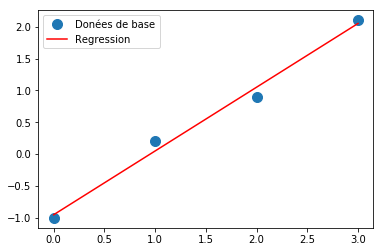

In [67]:
plt.plot(x, y, 'o', label='Donées de base', markersize=10)
plt.plot(x, m*x + c, 'r', label='Regression')
plt.legend()
plt.show()

## Matplotlib

Matplotlib est une librairie qui permet de tracer des graphes (dans le sens graphiques), grandement inspiré de Matlab au départ. Elle peut être utilisé de 2 façons :
- soit avec une approche objet : plus compliquée et plus verbeuse, mais plus évoluée.
- soit via des appels de fonctions, avec pyplot : plus simple. pyplot fournit ainsi des raccourcis qui évitent la formulation objet plus longue à écrire.

Elle permet notamment de faire des graphes qui peuvent être comlètement adaptés si besoin. Sur une figure, on peut tracer plusieurs graphes.

#### Notions principales pour les graphes sous matplotlib 
- figure : une figure qui peut être sauvée dans un fichier.
- axe : un graphe (graphique) individuel appartenant à une figure qui peut en compter plusieurs. Attention, ce n'est pas un axe de coordonnées !
- axis : un axe de coordonnées appartenant à un objet axe.
- divers objets graphiques qui dérivent de la classe Artist et qui participent au graphe. Ce sont par exemple des rectangles, des lignes, du texte. Ces différents objets peuvent être totalement configurés (y compris individuellement) pour adapter le graphe aux besoins en appelant dessus des méthodes pour modifier leurs propriétés !

#### Pyplot généralités : 

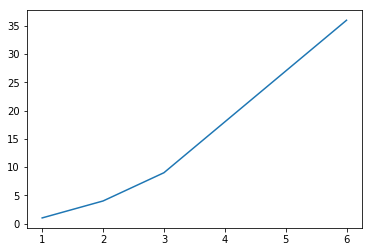

In [68]:
#Importer la librairie 
from matplotlib import pyplot
#graphique de base 
pyplot.plot([1, 2, 3, 6], [1, 4, 9, 36])
#Montrer le graphique 
pyplot.show()

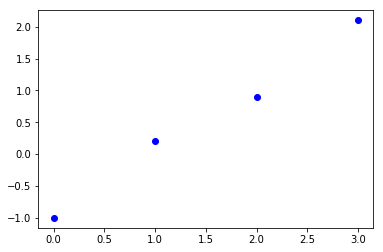

In [69]:
pyplot.plot(x, y, 'bo') #bleu et avec des ronds

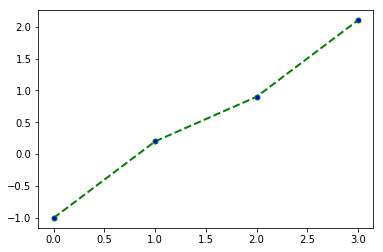

In [70]:
pyplot.plot(x, y, color = 'green', linestyle = 'dashed', linewidth = 2, marker = 'o', markerfacecolor = 'blue', markersize = 5) 
#symboles ronds en bleu avec une taille de 5 et traits pointillés en vert.

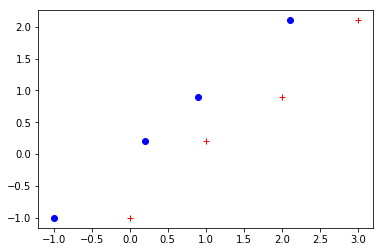

In [71]:
#on peut tracer plusieurs courbes sur le même graphe 
pyplot.plot(x, y, 'r+', y, y, 'bo')


Text(0.5,1,'Un exemple')

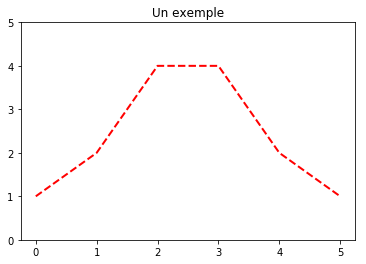

In [72]:
#Tracer un graphe d'une liste de valeurs en fonction du numéro d'ordre 
pyplot.plot([1, 2, 4, 4, 2, 1], color = 'red', linestyle = 'dashed', linewidth = 2, markerfacecolor = 'blue', markersize = 5)
pyplot.ylim(0, 5)
pyplot.title('Un exemple')

[Text(0,0,'lab0'),
 Text(0,0,'lab10'),
 Text(0,0,'lab20'),
 Text(0,0,'lab30'),
 Text(0,0,'lab40'),
 Text(0,0,'lab50'),
 Text(0,0,'lab60'),
 Text(0,0,'lab70'),
 Text(0,0,'lab80'),
 Text(0,0,'lab90')]

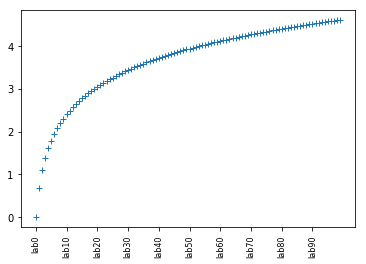

In [73]:
#Si on veut mettre des etiquettes tous les n valeurs   
import math
val = [math.log(i + 1) for i in range(100)]
lab = ['lab' + str(i) for i in range(100)]
pyplot.plot(val, linestyle = 'none', marker = '+')
pyplot.gca().get_xaxis().set_ticks([i for i in range(len(lab)) if i % 10 == 0])
pyplot.gca().get_xaxis().set_ticklabels([lab[i] for i in range(len(lab)) if i % 10 == 0], fontsize = 8, rotation = 90)

##### Sauvegarde de l'image dans un fichier  
- pyplot.savefig('image.png'); pyplot.close().
- pyplot.savefig('image.png', dpi = 600) : fixe la résolution.
- pyplot.savefig('image.png', transparent = True) : fond transparent.
- pyplot.savefig('image, format = 'pdf') : indique le format. Les formats supportés sont : png, pdf, eps, svg, sinon le format est deviné d'après l'extension du fichier.

##### Les Graphiques en bar 

([<matplotlib.axis.XTick at 0x1082a29b0>,
 <a list of 5 Text xticklabel objects>)

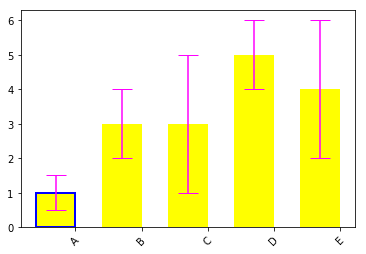

In [74]:
pyplot.bar(range(5), [1, 3, 3, 5, 4], width = 0.6, color = 'yellow', edgecolor = 'blue', linewidth = 2, yerr = [0.5, 1, 2, 1, 2], ecolor = 'magenta', capsize = 10)
pyplot.xticks([x + 0.6 / 2 for x in range(5)], ['A', 'B', 'C', 'D', 'E'], rotation = 45)

##### Exemple de barplot avec 2 séries superposées 

([<matplotlib.axis.XTick at 0x1083f6b38>,
 <a list of 4 Text xticklabel objects>)

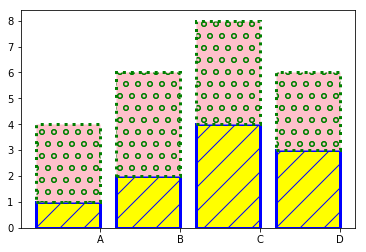

In [75]:
barWidth = 0.8
y1 = [1, 2, 4, 3]
y2 = [3, 4, 4, 3]
r = range(len(y1))
pyplot.bar(r, y1, width = barWidth, color = ['yellow' for i in y1],
           edgecolor = ['blue' for i in y1], linestyle = 'solid', hatch ='/',
           linewidth = 3)
pyplot.bar(r, y2, width = barWidth, bottom = y1, color = ['pink' for i in y1],
           edgecolor = ['green' for i in y1], linestyle = 'dotted', hatch = 'o',
           linewidth = 3)
pyplot.xticks([r + barWidth / 2 for r in range(len(y1))], ['A', 'B', 'C', 'D'])

([<matplotlib.axis.YTick at 0x10871b438>,
 <a list of 4 Text yticklabel objects>)

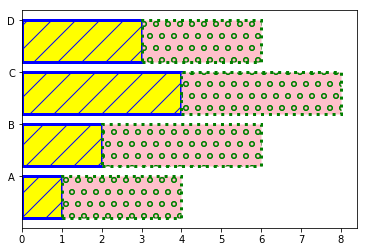

In [76]:
# passer à l'horizontale 
pyplot.barh(r, y1, height = barWidth, color = ['yellow' for i in y1],
           edgecolor = ['blue' for i in y1], linestyle = 'solid', hatch ='/',
           linewidth = 3)
pyplot.barh(r, y2, height = barWidth, left = y1, color = ['pink' for i in y1],
           edgecolor = ['green' for i in y1], linestyle = 'dotted', hatch = 'o',
           linewidth = 3)
pyplot.yticks([r + barWidth / 2 for r in range(len(y1))], ['A', 'B', 'C', 'D'])

##### On peut rajouter des barres d'erreur à un barplot 
- pyplot.errorbar(range(len(values)), values, yerr = errorValues, fmt = 'none')
- capsize = 10 : permet de rajouter des traits horizontaux aux extremités des barres d'erreur.
- ecolor = 'red' : pour choisir la couleur de la barre d'erreur.
- elinewidth = 5 : l'épaisseur du trait vertical
- capthick = 5 : l'épaisseur du petit trait horizontal.

<Container object of 3 artists>

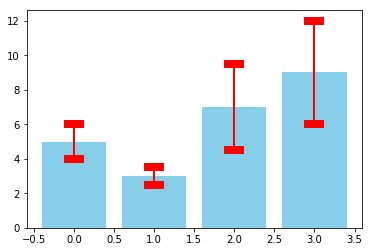

In [77]:
values = [5, 3, 7, 9]
errorValues = [1, 0.5, 2.5, 3]
pyplot.bar(range(len(values)), values, color = 'skyblue')
pyplot.errorbar(range(len(values)), values, yerr = errorValues,
    fmt = 'none', capsize = 10, ecolor = 'red', elinewidth = 2, capthick = 8)

##### Les histogrammes 

Text(0.5,1,"Exemple d' histogramme simple")

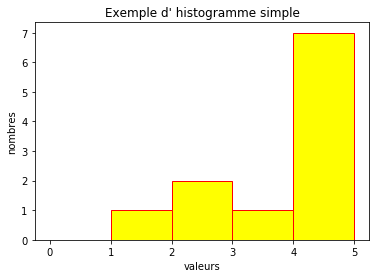

In [78]:
x = [1, 2, 2, 3, 4, 4, 4, 4, 4, 5, 5]
pyplot.hist(x, range = (0, 5), bins = 5, color = 'yellow',
            edgecolor = 'red')
pyplot.xlabel('valeurs')
pyplot.ylabel('nombres')

pyplot.title('Exemple d\' histogramme simple')

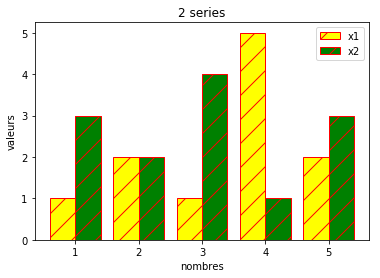

In [79]:
#Affichage de l'histogramme de 2 séries (les 2 couleurs sont obligatoires, par contre la couleur des bordures et les rayures ne sont communs)
x1 = [1, 2, 2, 3, 4, 4, 4, 4, 4, 5, 5]
x2 = [1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 5, 5, 5]
bins = [x + 0.5 for x in range(0, 6)]
pyplot.hist([x1, x2], bins = bins, color = ['yellow', 'green'],
            edgecolor = 'red', hatch = '/', label = ['x1', 'x2'],
            histtype = 'bar') # bar est le defaut
pyplot.ylabel('valeurs')
pyplot.xlabel('nombres')
pyplot.title('2 series')
pyplot.legend()

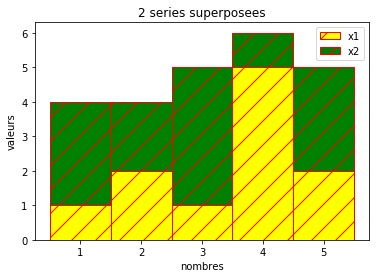

In [80]:
#Affichage de l'histogramme de 2 séries, mais sous forme superposées, l'un au dessus de l'autre
x1 = [1, 2, 2, 3, 4, 4, 4, 4, 4, 5, 5]
x2 = [1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 5, 5, 5]
bins = [x + 0.5 for x in range(0, 6)]
pyplot.hist([x1, x2], bins = bins, color = ['yellow', 'green'],
            edgecolor = 'red', hatch = '/', label = ['x1', 'x2'],
            histtype = 'barstacked')
pyplot.ylabel('valeurs')
pyplot.xlabel('nombres')
pyplot.title('2 series superposees')
pyplot.legend()

##### Les boites à moustaches 
La boîte à moustaches résume quelques caractéristiques de position du caractère étudié (médiane, quartiles, minimum, maximum ou déciles). Ce diagramme est utilisé principalement pour comparer un même caractère dans deux populations de tailles différentes.

Il s'agit de tracer un rectangle allant du premier quartile au troisième quartile et coupé par la médiane. Ce rectangle suffit pour le diagramme en boîte. On ajoute alors des segments aux extrémités menant jusqu'aux valeurs extrêmes, ou jusqu'aux premier et neuvième déciles. 

Text(0.5,1,'boxplot avec array 2d')

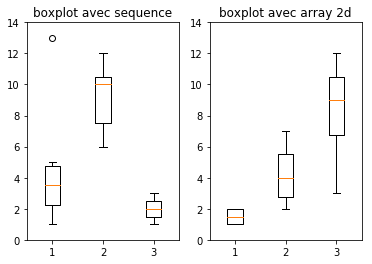

In [81]:
pyplot.subplot(121)
pyplot.boxplot([[1, 2, 3, 4, 5, 13], [6, 7, 8, 10, 10, 11, 12], [1, 2, 3]])
pyplot.ylim(0, 14)
pyplot.title('boxplot avec sequence')

pyplot.subplot(122)
pyplot.boxplot(np.array([[1, 2, 3], [2, 7, 8], [1, 3, 10], [2, 5, 12]]))
pyplot.ylim(0, 14)
pyplot.title('boxplot avec array 2d')

##### Les camemberts 

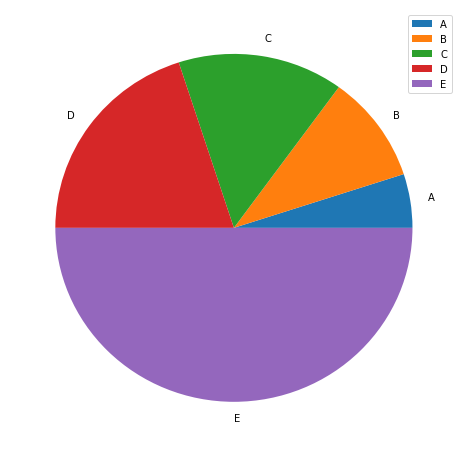

In [82]:
pyplot.figure(figsize = (8, 8))
x = [1, 2, 3, 4, 10]
pyplot.pie(x, labels = ['A', 'B', 'C', 'D', 'E'])
pyplot.legend()

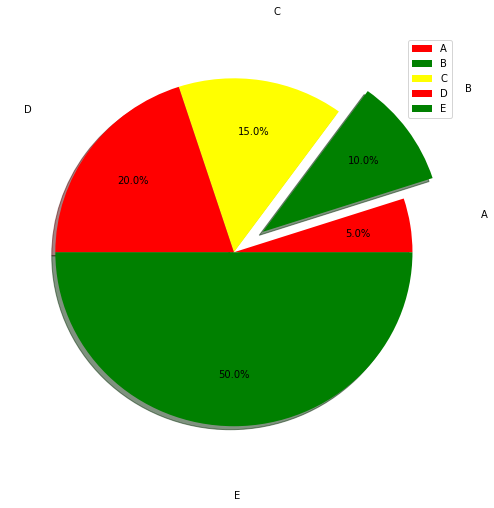

In [83]:
#plus complet 
pyplot.figure(figsize = (8, 8))
x = [1, 2, 3, 4, 10]
pyplot.pie(x, labels = ['A', 'B', 'C', 'D', 'E'],
           colors = ['red', 'green', 'yellow'],
           explode = [0, 0.2, 0, 0, 0],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True)
pyplot.legend()

##### Les Heatmap 

On peut représenter une matrice sous forme de heatmap (un carré par valeur, et une couleur qui dépend de cette valeur) 

Text(0.5,1.05,'exemple de matrice avec couleurs par defaut')

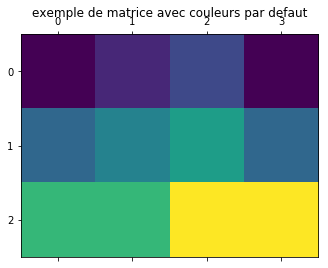

In [84]:
mat = [[1, 2, 3, 1], [4, 5, 6, 4], [7, 7, 10, 10]]

pyplot.matshow(mat)
pyplot.title('exemple de matrice avec couleurs par defaut')

<Container object of 5 artists>

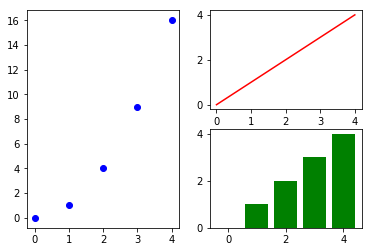

In [85]:
#Exemple de figure avec des graphes multiples 
pyplot.figure(1)
pyplot.subplot(1, 2, 1)
pyplot.scatter(range(5), [x ** 2 for x in range(5)], color = 'blue')
pyplot.subplot(2, 2, 2)
pyplot.plot(range(5), color = 'red')
pyplot.subplot(2, 2, 4)
pyplot.bar(range(5), range(5), color = 'green')

## Bokeh 

Bokeh est une bibliothèque de visualisation interactive qui cible les navigateurs Web afin de faire de la datavisualisation. Son objectif est de fournir une construction élégante et concise de graphiques variés interactifs de hautes performances sur des jeux de données très volumineux ou en flux continu. Bokeh peut aider tous ceux qui souhaitent créer rapidement et facilement des graphiques interactifs, des tableaux de bord et des applications de 
données.

### Installation via pip 
```python 
pip install bokeh
```

### Quickstart

In [86]:
#Importer la librairies 
from bokeh.plotting import figure, output_file, show
#déclaration du fichier de sortie 
output_file("test.html")
#figure 
p = figure()


In [87]:
#data random
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)
#affichage du plot
show(p)

#### Afficher plus d'informations 

In [88]:
#d'autre data random 
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]

#output
output_file("log_lines.html")

In [89]:
# créer un nouveau plot dans une figure 
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles'
)

In [90]:
# ajouter les data
p.line(x, x, legend="y=x")
p.circle(x, x, legend="y=x", fill_color="white", size=8)
p.line(x, y0, legend="y=x^2", line_width=3)
p.line(x, y1, legend="y=10^x", line_color="red")
p.circle(x, y1, legend="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend="y=10^x^2", line_color="orange", line_dash="4 4")

# affichier la figure 
show(p)

#### Jouer avec les vecteurs 

In [91]:
# prepare d'autres random data
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
#configurer les couleurs 
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

#output
output_file("color_scatter.html", title="color_scatter.py example", mode="cdn")

In [92]:
TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"
#figure avec les paramètres ci-dessus 
p = figure(tools=TOOLS, x_range=(0, 100), y_range=(0, 100))
#ajouter les points en fonction des couleurs et tailles 
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)
show(p)

#### Afficher les Datetime

In [93]:
import bokeh.sampledata
#télécharger les dataset de bokeh 
bokeh.sampledata.download()


Using data directory: /Users/benjamindallard/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3182088 bytes)
   3182088 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (5148539 bytes)
   5148539 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Downloading: gapminder_life_expectancy.csv (73243 bytes)
     73243 [100.00%]
Dow

In [94]:
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.stocks import AAPL

In [96]:
#préparer d'autre random data
aapl = np.array(AAPL['adj_close'])
aapl_dates = np.array(AAPL['date'], dtype=np.datetime64)
#paramétrage
window_size = 30
window = np.ones(window_size)/float(window_size)
aapl_avg = np.convolve(aapl, window, 'same')

#output 
output_file("stocks.html", title="stocks.py example")
#créer un nouveau plot avec un axis datetime
p = figure(width=800, height=350, x_axis_type="datetime")

#ajouter les data 
p.circle(aapl_dates, aapl, size=4, color='darkgrey', alpha=0.2, legend='close')
p.line(aapl_dates, aapl_avg, color='navy', legend='avg')

#Customiser les attribues 
p.title.text = "AAPL One-Month Average"
p.legend.location = "top_left"
p.grid.grid_line_alpha = 0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'
p.ygrid.band_fill_color = "olive"
p.ygrid.band_fill_alpha = 0.1
show(p)

#### Pour aller plus loin 
Pour explorer plus en détail bokeh nous vous invitons à consulter la documentation officiel <https://bokeh.pydata.org/en/latest/index.html> ainsi que l'activité Map.ipynb qui met en application des API. On utilisera durant les ateliers la librairie seaborn <https://seaborn.pydata.org> qui fonctionne sur le même principe. 

## Scikit-learn 

Scikit-learn est une bibliothèque libre Python destinée à l'apprentissage automatique. Elle est développée par de nombreux contributeurs notamment dans le monde académique par des instituts français d'enseignement supérieur et de recherche comme *Inria3* et *Télécom ParisTech*. Elle est conçue pour s'harmoniser avec d'autres bibliothèques libres Python, notamment NumPy et SciPy. 

### Importer un dataset exemple 

In [97]:
from sklearn import datasets
#iris et digits datasets d'images 8x8
iris = datasets.load_iris()
digits = datasets.load_digits()
#taille de l'image
print(digits.images.shape)
print(digits.data)

(1797, 8, 8)
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [98]:
#nombre correpondant aux images
print(digits.target)

[0 1 2 ..., 8 9 8]


### Les estimateurs 

Tous les objets estimateur exposent une méthode d’ajustement *fit(X, y)* qui prend un jeu de données (généralement un tableau à 2 dimensions numpy). 
Les estimateurs ont aussi des paramètres tel que : 
```python
estimator = Estimator(param1=1, param2=2)
```

#### Le SVM 
Le support vecteurs machines ou séparateurs à vaste marge (en anglais support vector machine, SVM) sont un ensemble de techniques d'apprentissage supervisé destinées à résoudre des problèmes de régréssions. 

In [99]:
from sklearn import svm
#nous verrons comment choisir les paramètres plus tard 
clf = svm.SVC(gamma=0.001, C=100.)

In [100]:
clf.fit(digits.data[:-1], digits.target[:-1]) 

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

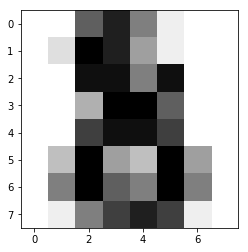

In [101]:
#voir la prédiction
clf.predict(digits.data[-1:])
#voir à quoi cela ressemble : 8
pyplot.imshow(digits.images[-1], cmap=pyplot.cm.gray_r)

### La régréssion linéaire 
Voir le notebook *StatBasics.ipynb* ou les repo Atelier3 et Atelier4. L'exemple ci-dessous est effectué à l'aire du dataset diabetes qui regrouppe 10 variables physiologiques (âge, sexe, poids, pression artérielle,...) sur 442 patients ainsi qu'une indication de la progression de la maladie après un an. 

In [102]:
#chargement des données
diabetes = datasets.load_diabetes()
#définitions des ensembles de test et de train
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

In [106]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_)

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


### Les arbre

Un arbre de décision est un outil d'aide à la décision représentant un ensemble de choix sous la forme graphique d'un arbre. Les différentes décisions possibles sont situées aux extrémités des branches (les « feuilles » de l'arbre), et sont atteints en fonction de décisions prises à chaque étape. L'arbre de décision est un outil utilisé dans des domaines variés tels que la sécurité, la fouille de données, la médecine, etc. Il a l'avantage d'être lisible et rapide à exécuter. Il s'agit de plus d'une représentation calculable automatiquement par des algorithmes d'apprentissage supervisé.

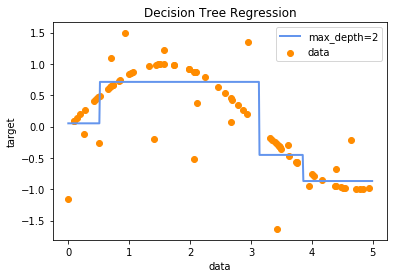

In [108]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

#données d'apprentissage random
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

#le modèle 
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

#la prédiction
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Affichage des résultats
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()